In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# SMAPE Calculator (competition-metric taken from geeksforgeeks)
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 4
    )

In [3]:
from dateutil.easter import easter
from datetime import datetime, date, timedelta
import holidays
from holidays import CountryHoliday

# Import data

In [4]:
train_data_ori = pd.read_csv('train.csv')
train_data_ori

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [5]:
test_data_ori = pd.read_csv('test.csv')
test_data_ori

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [6]:
train_data_ori.date = pd.to_datetime(train_data_ori.date)
test_data_ori.date = pd.to_datetime(test_data_ori.date)

# Feature Engineering

Abbreviation:
- IYC: Using LLMs to Improve Your Coding
- TTL: Using LLMs to Train More LLMs
- WFIP: Using LLMs to Win Friends and Influence People
- WMKC: Using LLMs to Win More Kaggle Competitions
- WB: Using LLMs to Write Better

In [169]:
gdp_df = pd.read_csv('economic_data/Gdp_data.csv', skiprows=4)
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,...,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11,NaN


In [115]:
gdp_gr_df = pd.read_csv('economic_data/gdp_growth.csv', skiprows=4)
gdp_gr_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.020479,3.543630,2.116716,5.482371,5.257855,0.635030,-18.589099,17.172509,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.254879,7.965825,5.148217,4.579328,5.346210,...,3.994682,2.974101,2.224524,2.546973,2.513984,2.087765,-2.888681,4.334927,3.404852,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.700000,NaN,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.854872,3.772845,7.278612,5.410812,4.081666,...,5.929463,2.750042,0.125435,2.313219,2.813142,3.212407,-0.927800,3.980848,3.762758,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403,NaN


In [96]:
cpi_df = pd.read_csv('economic_data/infl_rate.csv', skiprows=4)
cpi_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.245878,6.571396,6.399343,4.720811,4.653665,7.321106,6.824727,10.526577
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.768436,2.130817,1.487416,1.764635,1.784050,1.760112,2.437609,3.653533,7.967574
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266,NaN


In [25]:
unemp_df = pd.read_csv('economic_data/unemployment.csv', skiprows=4)
unemp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.555646,6.707142,6.855589,6.940365,6.913046,7.121663,7.631304,7.920219,7.916835,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635,4.742175,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000,10.209000,NaN


In [185]:
a=gdp_df.loc[gdp_df['Country Name']=='World', '2017'].values

In [186]:
b=gdp_df.loc[gdp_df['Country Name']=='Argentina', '2017'].values

In [197]:
def add_gdp(data):
    df = data.copy()
    min_year = min(df.date.dt.year)
    max_year = max(df.date.dt.year)
    years = list(range(min_year,max_year+1))
#     df[f'gdp_{2022}'] = 0
#     for year in years:
#         df[f'gdp_{year}'] = 0
    df['gdp'] = 0
    df['gdp_world_ratio'] = 0
    for c in list(set(train_data_ori.country)):
#         country_gdp = gdp_df.loc[gdp_df['Country Name']==c,'2017':'2022']
        for year in years:
            country_gdp = gdp_df.loc[gdp_df['Country Name']==c, str(year)].values
            world_gdp = gdp_df.loc[gdp_df['Country Name']=='World', str(year)].values
            gdp_ratio = country_gdp/world_gdp
            df['gdp'] = np.where(
                (df.country==c)&(df['Year']==year), np.log(country_gdp/1e+9), df['gdp']
            )
            df['gdp_world_ratio'] = np.where(
                (df.country==c)&(df['Year']==year), np.exp(gdp_ratio), df['gdp_world_ratio']
            )
    return df

In [116]:
def add_gdp_growth(data):
    df = data.copy()
    min_year = min(df.date.dt.year)
    max_year = max(df.date.dt.year)
    years = list(range(min_year,max_year+1))
#     df[f'gdp_{2022}'] = 0
#     for year in years:
#         df[f'gdp_{year}'] = 0
    df['gdp_growth'] = 0
    for c in list(set(train_data_ori.country)):
#         country_gdp = gdp_df.loc[gdp_df['Country Name']==c,'2017':'2022']
        for year in years:
            df['gdp_growth'] = np.where(
                (df.country==c)&(df['Year']==year),gdp_gr_df.loc[gdp_gr_df['Country Name']==c, str(year)],df['gdp_growth']
            )
    return df

In [223]:
def add_cpi(data):
    df = data.copy()
    min_year = min(df.date.dt.year)
    max_year = max(df.date.dt.year)
    years = list(range(min_year,max_year+1))
    df['cpi'] = 0
    for c in list(set(train_data_ori.country)):
        for year in years:
            df['cpi'] = np.where(
                (df.country==c)&(df['Year']==year),cpi_df.loc[cpi_df['Country Name']==c, str(year)],df['cpi']
            )
    return df

In [224]:
def add_unemp_rate(data):
    df = data.copy()
    min_year = min(df.date.dt.year)
    max_year = max(df.date.dt.year)
    years = list(range(min_year,max_year+1))
    df['unemp_rate'] = 0
    for c in list(set(train_data_ori.country)):
        for year in years:
            df['unemp_rate'] = np.where(
                (df.country==c)&(df['Year']==year),1/unemp_df.loc[unemp_df['Country Name']==c, str(year)].values,
                 df['unemp_rate']
            )
    return df

In [17]:
country_gdp=unemp_df.loc[unemp_df['Country Name']=='Spain','2017':'2022']
# pd.DataFrame(preprocessing.normalize(country_gdp), columns=country_gdp.columns).mean().mean()
(country_gdp.mean().mean())

14.981499999999999

Functions below provided by [RAVI RAMAKRISHNAN](https://www.kaggle.com/code/ravi20076/tpssep22-featureengineeringpipeline) on Kaggle and modified by me

In [18]:
def create_dateFeature(data):
    df = data.copy()
    imp_dates = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16,17,22,
                 124, 125, 126, 127, 140, 141, 167, 168, 
                 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 
                 180, 181, 203, 230, 231, 232, 233, 234, 282, 289, 
                 290, 307, 308, 309, 310, 311, 312, 313, 317, 318, 
                 319, 320, 360, 361, 362, 363, 364, 365]
    df['Year'] = df.date.dt.year.astype(np.int16)
    df['Qtr'] = df['date'].dt.quarter.astype(np.int8)
    df["Month"] = df["date"].dt.month.astype(np.int8)
    df["Month_Sin"] = (np.sin(df['Month'] * (2 * np.pi / 12))).astype(np.float32)
    df["Day"] = df["date"].dt.day.astype(np.int16)
    df["Day_Sin"] = (np.sin(df['Day'] * (2 * np.pi / 12))).astype(np.float32)
    df["Weekday"] = df["date"].dt.dayofweek.astype(np.int8)
    df['Week_Nb'] = np.clip(df['date'].dt.isocalendar().week, a_min = 0, a_max= 52)
    df['Is_Weekend'] = np.where(df['Weekday'] >= 5,1,0)
    df["DayofYear"] = df["date"].dt.dayofyear
    df["is_fri"] = df["Weekday"]==4
    df["is_sat"] = df["Weekday"]==5
    df["is_sat"] = df["Weekday"]==6
    df["is_weekday"] = df["Weekday"]<4
    df["DayofYear"] = \
        df.apply(lambda x: x["DayofYear"]-1 
                 if (x["date"] > pd.Timestamp("2020-02-29") and x["date"] < pd.Timestamp("2021-01-01"))  
                 else x["DayofYear"], axis=1)
    df['Is_ImpDate'] = df['DayofYear'].apply(lambda x: x if x in imp_dates else 0);
    
    # covid dates
#     covid_concern = pd.Timestamp('2020-01-30')
    covid_pandemic = pd.Timestamp('2020-04-01')
#     arg_first_case = pd.Timestamp('2020-03-03')
#     can_first_case = pd.Timestamp('2020-01-27')
#     jp_first_case = pd.Timestamp('2020-01-16')
#     sp_first_case = pd.Timestamp('2020-01-31',)
#     es_first_case = pd.Timestamp('2020-02-27')
    
    df['is_covid'] = (df.date.dt.year==2020)
#     df['world_pandemic_covid'] = (df['date']==covid_pandemic)
        
#     for day in (list(range(-5, 40))):
#         df[f'covid_{day}'] = (df.date - covid_pandemic).dt.days.eq(day)
          
#     df.drop(['Day','Weekday'], axis=1, inplace=True)
        
    return df

In [19]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
def add_fourier(df):
    tempDf = df.copy()
#     tempDf.set_index('date', inplace=True).to_period('D')
    month = df.date.dt.month
#     fourier = CalendarFourier(freq='M', order=12)
#     dp = DeterministicProcess(index=tempDf.index, 
#                               constant=False, order=1, seasonal=False, 
#                               additional_terms=[fourier], drop=True)
    for k in range(1,2):
        tempDf[f'sin{k}'] = np.sin(month / 12 * 2 * np.pi * k)
        tempDf[f'cos{k}'] = np.cos(month / 12 * 2 * np.pi * k)
        tempDf[f'IYC_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Improve Your Coding']
        tempDf[f'IYC_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Improve Your Coding']
        tempDf[f'TTL_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Train More LLMs']
        tempDf[f'TTL_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Train More LLMs']
        tempDf[f'WMKC_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Win More Kaggle Competitions']
        tempDf[f'WMKC_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Win More Kaggle Competitions']
        tempDf[f'WB_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Write Better']
        tempDf[f'WB_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Write Better']
    return tempDf

In [20]:
from sklearn.preprocessing import SplineTransformer
def DoSplineXform(period, n_splines = None, degree=3):
    """
    This function performs spline transform preprocessing on the provided data-frame
    """
    
    if n_splines is None: n_splines = period
    n_knots = n_splines + 1
    return SplineTransformer(degree=degree, n_knots=n_knots, 
                             knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
                             extrapolation="periodic",
                             include_bias=True
                            )

def MakeSplineFtre(hours = np.arange(1,32)):
    """
    This function makes spline features from the data
    """
    
    hour_df    = pd.DataFrame(np.linspace(1, 32, 32).reshape(-1, 1),columns= ["Day"])
    splines    = DoSplineXform(32, n_splines=4).fit_transform(hour_df)
    splines_df = pd.DataFrame(splines,columns=[f"spline{i}" for i in range(splines.shape[1])])
    splines_df = pd.concat([pd.Series(hours, name='Day'), splines_df], axis="columns")
    
    return splines_df

In [23]:
def make_features(df):
    print("adding date features ...")
    tempDf = create_dateFeature(df)
    print("adding GDP features ...")
    tempDf = add_gdp(tempDf)
    print("adding cpi ...")    
    tempDf = add_cpi(tempDf)
    print("adding unemployment rate ...")    
    tempDf = add_unemp_rate(tempDf)
    countries = list(set(train_data_ori['country']))
    products = list(set(train_data_ori['product']))
    stores = list(set(train_data_ori['store']))
#     products.remove('Using LLMs to Win Friends and Influence People')
#     stores.remove('Kaggle Learn')
    print("adding dummies ...")
    for c in countries:
        tempDf[f'country_{c}'] = tempDf.country == c
        
    for p in products:
        tempDf[f'{p}'] = tempDf['product'] == p
        
    for s in stores:
        tempDf[f'store_{s}'] = tempDf.store == s
        
    print("adding fourier ...")    
    tempDf = add_fourier(tempDf)
    Spline_Prf = MakeSplineFtre()
    tempDf = tempDf.merge(Spline_Prf, on = 'Day', how = 'left')
    tempDf.drop(['store','country','product'], axis=1, inplace=True)
    tempDf = tempDf.loc[~tempDf.date.between(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-30'))]
    return tempDf

In [225]:
train_eng = make_features(train_data_ori)
train_eng.set_index('date', drop=False, inplace=True)
train_eng.iloc[12000:12010]

adding date features ...
adding GDP features ...
adding cpi ...
adding unemployment rate ...
adding dummies ...
adding fourier ...


,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,TTL_sin1,TTL_cos1,WMKC_sin1,WMKC_cos1,WB_sin1,WB_cos1,spline0,spline1,spline2,spline3
date,,,,,,,,,,,,,,,,,,,,,
2017-06-10,12000,2017-06-10,40,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12001,2017-06-10,36,2017,2,6,1.224647e-16,10,-0.866025,5,...,1.224647e-16,-1.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12002,2017-06-10,5,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12003,2017-06-10,29,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,1.224647e-16,-1.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12004,2017-06-10,34,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,0.000000e+00,-0.0,1.224647e-16,-1.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12005,2017-06-10,60,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12006,2017-06-10,56,2017,2,6,1.224647e-16,10,-0.866025,5,...,1.224647e-16,-1.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12007,2017-06-10,9,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,0.000000e+00,-0.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104
2017-06-10,12008,2017-06-10,45,2017,2,6,1.224647e-16,10,-0.866025,5,...,0.000000e+00,-0.0,1.224647e-16,-1.0,0.000000e+00,-0.0,0.002604,0.070312,0.611979,0.315104


# Building Models

In [242]:
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
from sklearn.model_selection import TimeSeriesSplit, GroupKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso

In [243]:
X = train_eng.drop(['id','num_sold','date'], axis=1).astype('float')
y = np.log(train_eng['num_sold'].values).reshape(-1,1)

In [244]:
features = list(X.columns)
print(features)

['Year', 'Qtr', 'Month', 'Month_Sin', 'Day', 'Day_Sin', 'Weekday', 'Week_Nb', 'Is_Weekend', 'DayofYear', 'is_fri', 'is_sat', 'is_weekday', 'Is_ImpDate', 'is_covid', 'gdp', 'gdp_world_ratio', 'cpi', 'unemp_rate', 'country_Argentina', 'country_Spain', 'country_Canada', 'country_Japan', 'country_Estonia', 'Using LLMs to Win More Kaggle Competitions', 'Using LLMs to Write Better', 'Using LLMs to Improve Your Coding', 'Using LLMs to Train More LLMs', 'Using LLMs to Win Friends and Influence People', 'store_Kaggle Learn', 'store_Kagglazon', 'store_Kaggle Store', 'sin1', 'cos1', 'IYC_sin1', 'IYC_cos1', 'TTL_sin1', 'TTL_cos1', 'WMKC_sin1', 'WMKC_cos1', 'WB_sin1', 'WB_cos1', 'spline0', 'spline1', 'spline2', 'spline3']


In [245]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [246]:
def build_model(X, y, model_name='linear'):
    if model_name=='ridge':
        model = Ridge()
    else:
        model = LinearRegression()
    model.fit(X, y)
        
    return model

In [247]:
def resid_plot(country, store, product, model, f_eng_name, features):
    example_df = pd.DataFrame({'id': 0,
                            'date': pd.date_range('2017-01-01', '2022-12-31', freq='D'),
                            'country': country,
                            'store': store,
                            'product': product})
    example_df = f_eng_name(example_df)
    example_df['num_sold'] = np.exp(model.predict(scaler.transform(example_df[features])))
    example_df = example_df.groupby(example_df['date']).mean()
    plt.figure(figsize=(20, 6))
    plt.plot(example_df.index, example_df.num_sold, label='prediction')
    ori_df = train_data_ori[(train_data_ori.country==country)&(train_data_ori.store==store)&(train_data_ori['product']==product)]
    ori_df = ori_df.groupby('date').mean()
    plt.scatter(ori_df.index, ori_df.num_sold, label='true', alpha=0.5, color='red', s=3)
    plt.legend()
    plt.title('Predictions and true num_sold for 6 years')
    plt.show()

In [248]:
def predict_plot(model, f_eng_name, features):
    example_df = pd.concat([train_data_ori, test_data_ori])
    example_df = f_eng_name(example_df)
    example_df['num_sold'] = np.exp(model.predict(scaler.transform(example_df[features])))
    example_df = example_df.groupby(example_df['date']).mean()
    plt.figure(figsize=(20, 6))
    plt.plot(example_df.index, example_df.num_sold, label='prediction')
    ori_df = train_data_ori.copy()
    ori_df = ori_df.groupby('date').mean()
    plt.scatter(ori_df.index, ori_df.num_sold, label='true', alpha=0.5, color='red', s=3)
    plt.legend()
    plt.title('All Predictions and true num_sold for 6 years')
    plt.show()

## Building Models without Holidays

adding date features ...
adding GDP features ...
adding cpi ...
adding unemployment rate ...
adding dummies ...
adding fourier ...


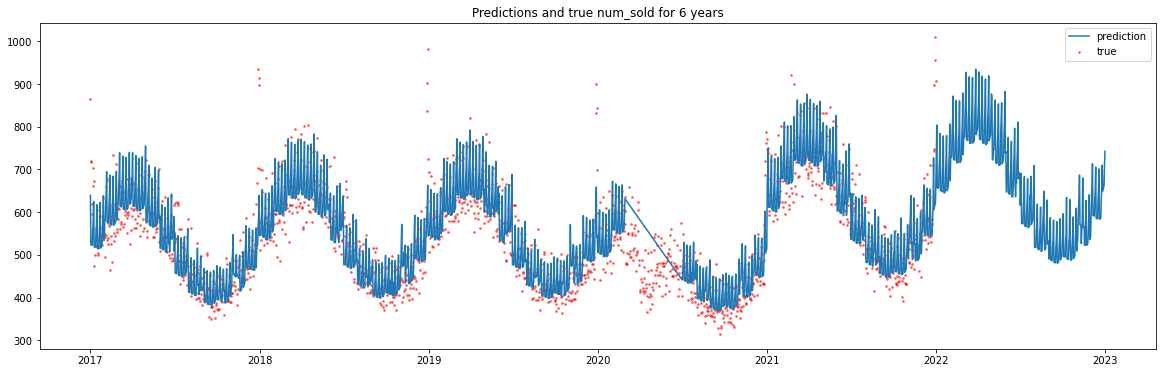

In [249]:
model1 = build_model(X_scaled, y.ravel(), 'ridge')
resid_plot('Canada', 'Kagglazon', 'Using LLMs to Write Better', model1, make_features, features)

Model adjust well to growth/decline with GDP feature.

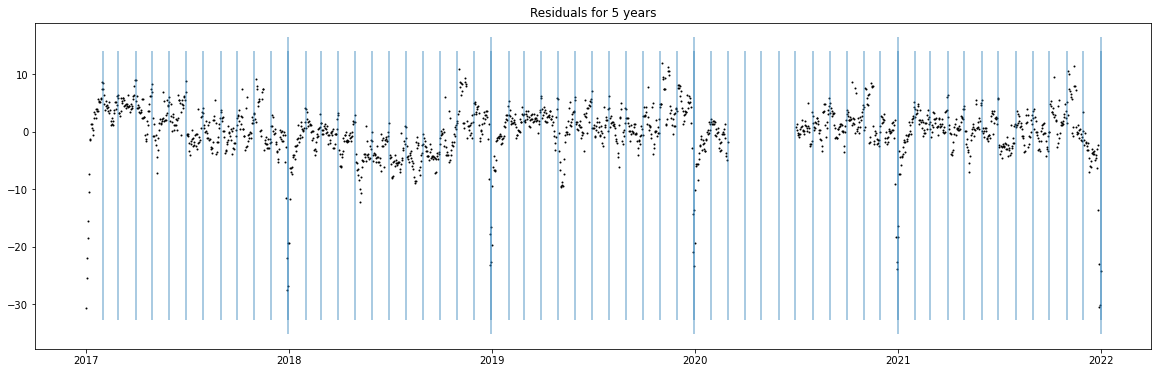

In [38]:
train_eng['pred'] = np.exp(model1.predict(scaler.transform(train_eng.drop(['id','num_sold','date'], axis=1))))
group_date = train_eng.groupby(train_eng['date'])
residuals = (group_date.pred.sum() - group_date.num_sold.sum()) / (group_date.pred.sum() + group_date.num_sold.sum()) * 200

def plot_all_residuals(residuals):
    plt.figure(figsize=(20,6))
    plt.scatter(residuals.index,
                residuals,
                s=1, color='k')
    plt.vlines(pd.date_range('2017-01-01', '2022-01-01', freq='M'),
               plt.ylim()[0], plt.ylim()[1], alpha=0.5)
    plt.vlines(pd.date_range('2017-01-01', '2022-01-01', freq='Y'),
               plt.ylim()[0], plt.ylim()[1], alpha=0.5)
    plt.title('Residuals for 5 years')
    plt.show()
    
plot_all_residuals(residuals)

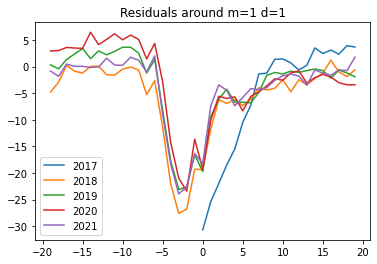

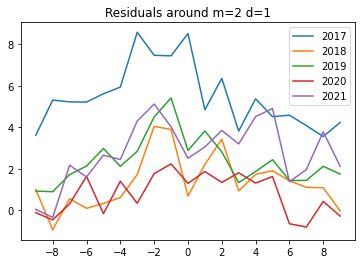

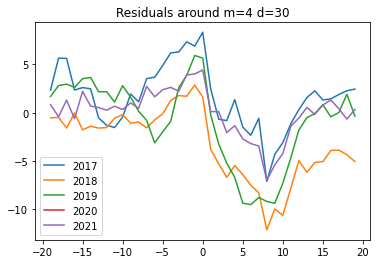

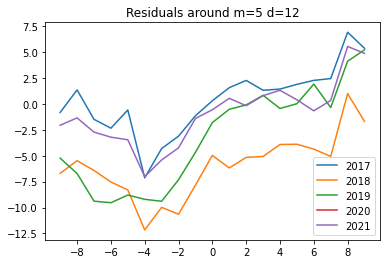

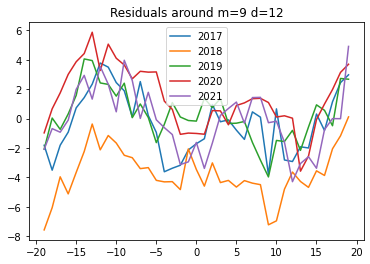

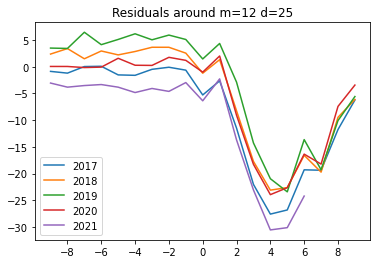

In [39]:
def plot_around(residuals, m, d, w):
    """Plot residuals in an interval of with 2*w around month=m and day=d"""
    plt.figure()
    plt.title(f"Residuals around m={m} d={d}")
    for y in np.arange(2017, 2022):
        d0 = pd.Timestamp(date(y, m, d))
        residual_range = residuals[(residuals.index > d0 - timedelta(w)) & 
                                   (residuals.index < d0 + timedelta(w))]
        plt.plot([(r - d0).days for r in residual_range.index], residual_range, label=str(y))
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
    plt.legend()
    plt.show()
plot_around(residuals, 1, 1, 20)
plot_around(residuals, 2, 1, 10)
plot_around(residuals, 4, 30, 20)
plot_around(residuals, 5, 12, 10)
plot_around(residuals, 9, 12, 20)
plot_around(residuals, 12, 25, 10)

Abbreviation:
- IYC: Using LLMs to Improve Your Coding
- TTL: Using LLMs to Train More LLMs
- WFIP: Using LLMs to Win Friends and Influence People
- WMKC: Using LLMs to Win More Kaggle Competitions
- WB: Using LLMs to Write Better

High residuals mainly are located in:
- Early January (New Year). It is particularly higher in 2017.
- Around end of April to early May (Post-Easter/Golden week in Japan)

Additional interesting months from EDA:
- February (lowest sales of IYC, TTL, WFIP)
- March - May (Highest sales of WB)
- May (Highest sales of TTL in Japan)
- June (lowest sales of WMKC)
- July (lowest sales of WMKC in Estonia)
- September (lowest sales of WB)
- Japan does not consider Christmas as a national holiday
- Estonia has high sales during end of July.

We could use them as an interaction with addition of holidays such as Christmas and New Year that accomodates high sales during that time.

In [40]:
def eng_easter(data):
    df = data.copy()
    easter_date = df.date.apply(lambda date: pd.Timestamp(easter(date.year)))       
    for day in (list(range(-2, 8))+list(range(40,48))):
        df[f'Easter_{day}'] = (df.date - easter_date).dt.days.eq(day)
        
    for col in df.columns :
            if 'Easter' in col : df = pd.get_dummies(df, columns = [col], drop_first=True)
    
    return df

In [41]:
def holiday_mapper(data):
    df = data.copy()
    period = range(2017, 2022, 1)
    for i in list(set(train_data_ori['country'])):
        holidays = CountryHoliday(i, years=period)
        df['Holiday'] = df['date'].map(holidays).fillna('Not Holiday')
        
        df['Holiday'] = df['Holiday'].apply(lambda x: x 
                                                  if x != 'Asunción de la Virgen (Trasladado)' 
                                                  else 'Not Holiday')
        df['Is_Holiday'] = np.where(df['Holiday']=='Not Holiday',0,1)
    
    df.drop('Holiday', axis=1,inplace=True)
#     
#     df['is_christmas_ny'] = (
#         (df.country!='Japan') &
#         ((df.Month==12) & ((df.Day>=25) & (df.Day<=31)) | (df.Month==1) & (df.Day==1))
#     )
#     newyear_jan_date = df.date.apply(lambda date: pd.Timestamp(date.year,1,1))
#     newyear_dec_date = df.date.apply(lambda date: pd.Timestamp(date.year,12,31))
#     for day in (list(range(11))):
#         df[f'newYearJan_{day}'] = np.where(df.country!='Japan',(df.date - newyear_jan_date).dt.days.eq(day),0)
#     for day in (list(range(-5,1))):
#         df[f'newYearDec_{day}'] = np.where(df.country!='Japan',(df.date - newyear_dec_date).dt.days.eq(day),0)
    
#     # Applying christmas and excluding Japan
#     christmas_date = df.date.apply(lambda date: pd.Timestamp(date.year,12,25))       
#     for day in (list(range(-4,7))):
#         df[f'Christmas_{day}'] = np.where(df.country!='Japan',(df.date - christmas_date).dt.days.eq(day),0)

    for d in range(25,32):
        c_day = df.date.apply(lambda date: pd.Timestamp(date.year,12,d))
        df[f'Christmas_{d}'] = np.where(df.country!='Japan',(df.date - c_day).dt.days.eq(0),0)
    for d in range(1,10):
        ny_day = df.date.apply(lambda date: pd.Timestamp(date.year,1,d))
        df[f'newYear_{d}'] = (df.date - ny_day).dt.days.eq(0)    
        
    return df

In [42]:
def add_jp_holiday(data):
    df = data.copy()
        
#     showa_day = df.date.apply(lambda date: pd.Timestamp(date.year,4,29))       
#     for day in (list(range(-2, 4))):
#         df[f'showa_{day}'] = np.where(df.country=='Japan',(df.date - showa_day).dt.days.eq(day),0)
#     constitution_memorial_day = df.date.apply(lambda date: pd.Timestamp(date.year,5,3)) 
#     for day in (list(range(8))):
#         df[f'constitution_{day}'] = np.where(df.country=='Japan',(df.date - constitution_memorial_day).dt.days.eq(day),0)
#     greenery_day = df.date.apply(lambda date: pd.Timestamp(date.year,5,4)) 
#     for day in (list(range(-1, 7))):
#         df[f'greenery_{day}'] = np.where(df.country=='Japan',(df.date - greenery_day).dt.days.eq(day),0)
#     children_day = df.date.apply(lambda date: pd.Timestamp(date.year,5,5)) 
#     for day in (list(range(-2, 6))):
#         df[f'children_{day}'] = np.where(df.country=='Japan',(df.date - children_day).dt.days.eq(day),0)

    for d in range(4,15):
        gw_day = df.date.apply(lambda date: pd.Timestamp(date.year,5,d))
        df[f'goldenWeek_{d}'] = np.where(df.country=='Japan',(df.date - gw_day).dt.days.eq(0),0)
#     df['goldenWeek'] = np.where((df.country=='Japan'), ((df.date>=showa_day)&(df.date<=children_day)),0)
    
    return df

In [43]:
def add_ind_day(data):
    df = data.copy()
    dates_list = [
             (5,3),
             (6,24),
             (7,1),
             (12,6),
             (7,9),
           ]
    countries = ['Japan','Estonia', 'Canada', 'Spain', 'Argentina']
    for i, (country, day) in enumerate(zip(countries, dates_list)):
        ind_date = df.date.apply(lambda date: pd.Timestamp(date.year,day[0],day[1]))
        for day in (list(range(1))+list(range(3,9))):
#             if not df[f'ind_day_{day}']:
#                 df[f'ind_day_{day}']=0
            try:
                df[f'ind_day_{day}'] = np.where(df['country']==country, 
                                            (df.date - ind_date).dt.days.eq(day), df[f'ind_day_{day}'])
            except:
                df[f'ind_day_{day}']=0
                df[f'ind_day_{day}'] = np.where(df['country']==country, 
                                            (df.date - ind_date).dt.days.eq(day), df[f'ind_day_{day}'])
    
    return df

In [44]:
# def add_trends(data):
#     df = data.copy()
#     df['feb_IYC'] = np.where((df.Month==2)&(df['Using LLMs to Improve Your Coding']==1), 1, 0)
#     df['feb_TTL'] = np.where((df.Month==2)&(df['Using LLMs to Train More LLMs']==1), 1, 0)
#     df['feb_WFIP'] = np.where((df.Month==2)&(df['Using LLMs to Win Friends and Influence People']==1), 1, 0)
#     df['mar_WB'] = np.where((df.Month==3)&(df['Using LLMs to Write Better']==1), 1, 0)
#     df['apr_WB'] = np.where((df.Month==4)&(df['Using LLMs to Write Better']==1), 1, 0)
#     df['may_WB'] = np.where((df.Month==5)&(df['Using LLMs to Write Better']==1), 1, 0)
#     df['jun_WMKC'] = np.where((df.Month==6)&(df['Using LLMs to Win More Kaggle Competitions']==1), 1, 0)
#     df['jul_WMKC_Est'] = np.where(
#                             df.Month==7, df['country_Estonia']*df['Using LLMs to Win More Kaggle Competitions'], 0)
#     df['sept_WB'] = np.where((df.Month==9)&(df['Using LLMs to Write Better']==1), 1, 0)
    
#     return df

In [250]:
def make_features2(df):
    print("adding date features ...")
    tempDf = create_dateFeature(df)
    print("adding spline features ...")
    Spline_Prf = MakeSplineFtre()
    tempDf = tempDf.merge(Spline_Prf, on = 'Day', how = 'left')
    print("adding GDP features ...")
    tempDf = add_gdp(tempDf)
    print("adding GDP Growth features ...")
    tempDf = add_gdp_growth(tempDf)
    print("adding CPI features ...")
    tempDf = add_cpi(tempDf)
    print("adding unemployment rate ...")    
    tempDf = add_unemp_rate(tempDf)
#     print("adding easter features ...")
#     tempDf = eng_easter(tempDf)
    print("adding holiday features ...")
    tempDf = holiday_mapper(tempDf)
    
    countries = list(set(train_data_ori['country']))
    products = list(set(train_data_ori['product']))
    stores = list(set(train_data_ori['store']))
#     products.remove('Using LLMs to Win Friends and Influence People')
#     stores.remove('Kaggle Learn')
    print("adding dummies ...")
    for c in countries:
        tempDf[f'country_{c}'] = tempDf.country == c
        
    for p in products:
        tempDf[f'{p}'] = tempDf['product'] == p
        
    for s in stores:
        tempDf[f'store_{s}'] = tempDf.store == s
        
    print("adding fourier ...")    
    tempDf = add_fourier(tempDf)
    print("adding independence days ...")   
    tempDf = add_ind_day(tempDf)
    print("adding Japan holiday ...")
    tempDf = add_jp_holiday(tempDf)
#     print("adding Estonia holiday ...")
#     tempDf = add_es_holiday(tempDf)
#     print("adding Canada holiday ...")
#     tempDf = add_ca_holiday(tempDf)
    tempDf.drop(['store','country','product'], axis=1, inplace=True)
    tempDf = tempDf.loc[~tempDf.date.between(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-05-31'))]
    return tempDf

In [272]:
train_eng2 = make_features2(train_data_ori)
# train_eng2.set_index('date', drop=False, inplace=True)
train_eng2.iloc[12000:12010]

adding date features ...
adding spline features ...
adding GDP features ...
adding GDP Growth features ...
adding CPI features ...
adding unemployment rate ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,goldenWeek_5,goldenWeek_6,goldenWeek_7,goldenWeek_8,goldenWeek_9,goldenWeek_10,goldenWeek_11,goldenWeek_12,goldenWeek_13,goldenWeek_14
12000,12000,2017-06-10,40,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12001,12001,2017-06-10,36,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12002,12002,2017-06-10,5,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12003,12003,2017-06-10,29,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12004,12004,2017-06-10,34,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12005,12005,2017-06-10,60,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12006,12006,2017-06-10,56,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12007,12007,2017-06-10,9,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12008,12008,2017-06-10,45,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0
12009,12009,2017-06-10,53,2017,2,6,1.224647e-16,10,-0.866025,5,...,0,0,0,0,0,0,0,0,0,0


In [273]:
train_eng2['unemp_rate'] = 1/train_eng2['unemp_rate']
X = train_eng2.drop(['id','num_sold','date'], axis=1).astype('float')
y = np.log(train_eng2['num_sold'].values).reshape(-1,1)

In [274]:
features = X.columns.to_list()
print(features)

['Year', 'Qtr', 'Month', 'Month_Sin', 'Day', 'Day_Sin', 'Weekday', 'Week_Nb', 'Is_Weekend', 'DayofYear', 'is_fri', 'is_sat', 'is_weekday', 'Is_ImpDate', 'is_covid', 'spline0', 'spline1', 'spline2', 'spline3', 'gdp', 'gdp_world_ratio', 'gdp_growth', 'cpi', 'unemp_rate', 'Is_Holiday', 'Christmas_25', 'Christmas_26', 'Christmas_27', 'Christmas_28', 'Christmas_29', 'Christmas_30', 'Christmas_31', 'newYear_1', 'newYear_2', 'newYear_3', 'newYear_4', 'newYear_5', 'newYear_6', 'newYear_7', 'newYear_8', 'newYear_9', 'country_Argentina', 'country_Spain', 'country_Canada', 'country_Japan', 'country_Estonia', 'Using LLMs to Win More Kaggle Competitions', 'Using LLMs to Write Better', 'Using LLMs to Improve Your Coding', 'Using LLMs to Train More LLMs', 'Using LLMs to Win Friends and Influence People', 'store_Kaggle Learn', 'store_Kagglazon', 'store_Kaggle Store', 'sin1', 'cos1', 'IYC_sin1', 'IYC_cos1', 'TTL_sin1', 'TTL_cos1', 'WMKC_sin1', 'WMKC_cos1', 'WB_sin1', 'WB_cos1', 'ind_day_0', 'ind_day_3'

In [275]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

adding date features ...
adding spline features ...
adding GDP features ...
adding GDP Growth features ...
adding CPI features ...
adding unemployment rate ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


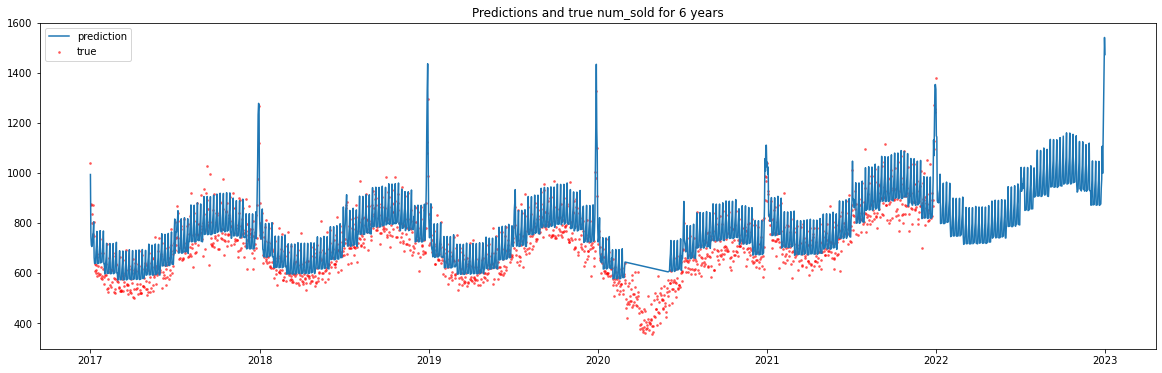

In [276]:
model2 = build_model(X_scaled, y.ravel(), 'ridge')
resid_plot('Canada', 'Kagglazon', 'Using LLMs to Improve Your Coding', model2, make_features2, features)

adding date features ...
adding spline features ...
adding GDP features ...
adding GDP Growth features ...
adding CPI features ...
adding unemployment rate ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


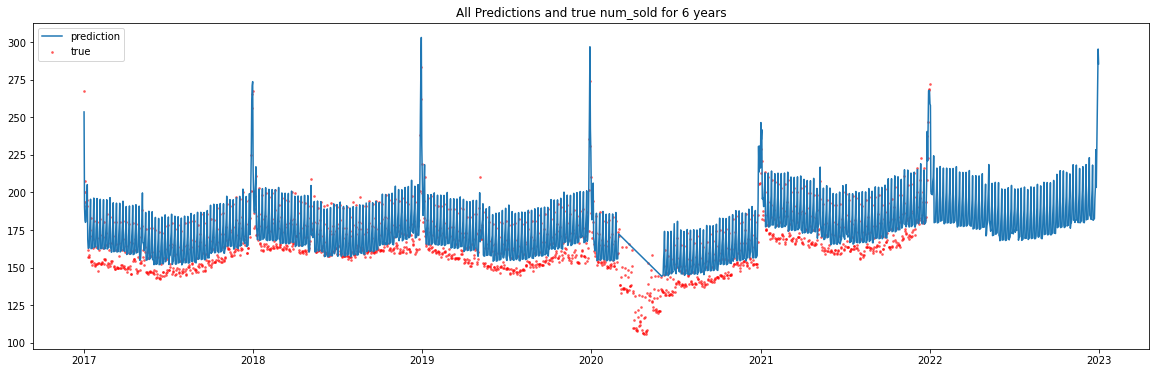

In [277]:
predict_plot(model2, make_features2, features)

In [278]:
# train_eng2.drop('pred', axis=1, inplace=True)
train_eng2['pred'] = np.exp(model2.predict(scaler.transform(train_eng2.drop(['id','num_sold','date'], axis=1))))
group_date = train_eng2.groupby(train_eng2['date'])
residuals = (group_date.pred.sum() - group_date.num_sold.sum()) / (group_date.pred.sum() + group_date.num_sold.sum()) * 200

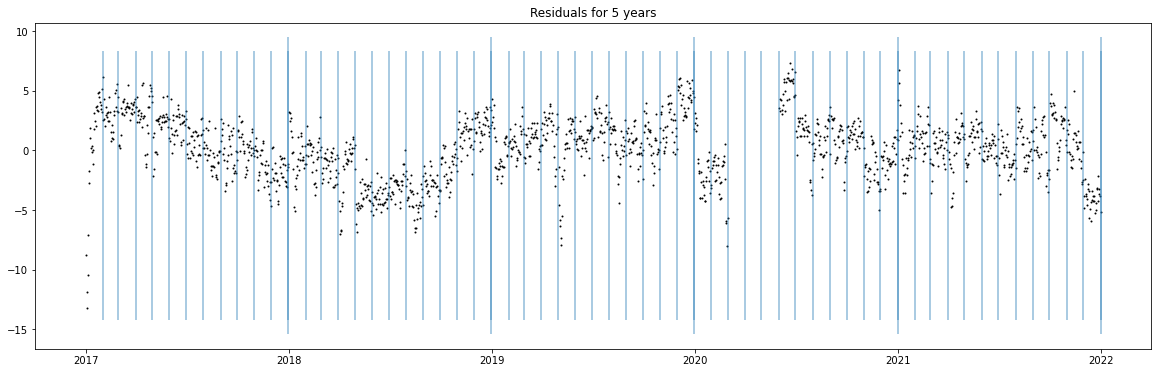

In [279]:
plot_all_residuals(residuals)

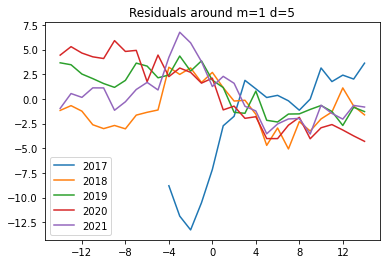

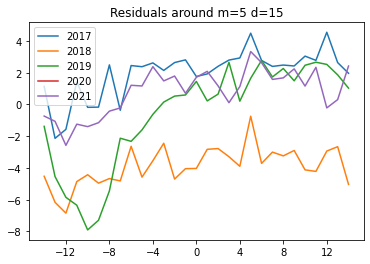

In [259]:
plot_around(residuals, 1, 5, 15)
plot_around(residuals, 5, 15, 15)

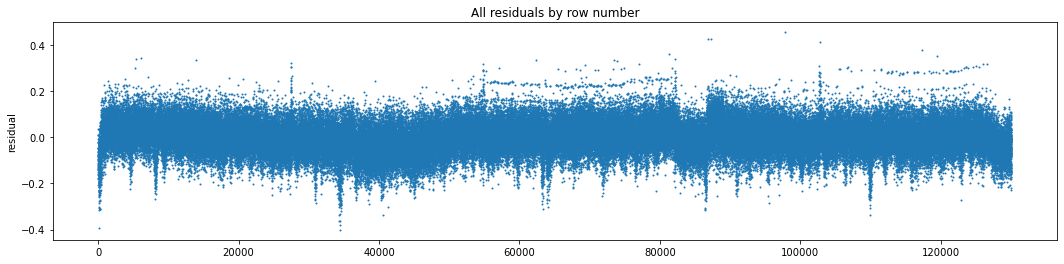

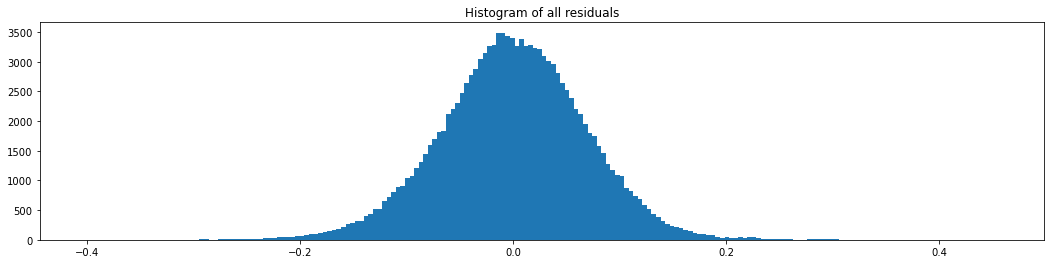

Standard deviation of log residuals: 0.069


In [280]:
residuals = np.log(train_eng2.pred) - np.log(train_eng2.num_sold)
plt.figure(figsize=(18, 4))
plt.scatter(np.arange(len(residuals)), residuals, s=1)
plt.title('All residuals by row number')
plt.ylabel('residual')
plt.show()
plt.figure(figsize=(18, 4))
plt.hist(residuals, bins=200)
plt.title('Histogram of all residuals')
plt.show()
print(f"Standard deviation of log residuals: {residuals.std():.3f}")

In [281]:
train_eng2['residuals'] = residuals

In [282]:
train_eng2['DayofYear'] = train_eng2.date.dt.dayofyear
train_eng2.loc[(train_eng2.date.dt.year != 2020) & (train_eng2.date.dt.month >= 3), 'DayofYear'] += 1

from scipy.stats import norm
print("Look for residuals beyond:", norm.ppf([0.5/365, 364.5/365]))

rr = train_eng2.residuals.groupby(train_eng2.DayofYear).mean()
rrstd = rr.std()
print(f"Standard deviation when grouped by dayofyear: {rrstd:.5f}")
rrdf = pd.DataFrame({'residual': rr, 'z_score': rr / rrstd, 'date': pd.date_range('2020-01-01', '2020-12-31')})
rrdf[rrdf.z_score.abs() > 3]

Look for residuals beyond: [-2.99552527  2.99552527]
Standard deviation when grouped by dayofyear: 0.01240


,residual,z_score,date
DayofYear,,,
60,-0.090486,-7.298110,2020-02-29
124,-0.042733,-3.446630,2020-05-03
126,-0.049544,-3.995964,2020-05-05
127,-0.045763,-3.691007,2020-05-06


In [263]:
train_eng2['country'] = list(train_data_ori.loc[~train_data_ori.date.between(pd.Timestamp('2020-03-01'),pd.Timestamp('2020-05-31')), 'country'])
rr = train_eng2.residuals.groupby([train_eng2.country, train_eng2.DayofYear]).mean()
rrstd = rr.std()
print(f"Standard deviation when grouped by country and dayofyear: {rrstd:.5f}")
rrdf = pd.DataFrame({'residual': rr, 'z_score': rr / rrstd, 'date': np.datetime64('2018-12-31') + pd.to_timedelta(rr.index.get_level_values(1), 'D')})
rrdf[rrdf.z_score.abs() > 3]

Standard deviation when grouped by country and dayofyear: 0.02406


residual   z_score       date
country   DayofYear                               
Argentina 60        -0.186059 -7.733294 2019-03-01
          95        -0.078853 -3.277420 2019-04-05
          96        -0.111665 -4.641225 2019-04-06
          97        -0.134796 -5.602610 2019-04-07
          98        -0.129437 -5.379897 2019-04-08
          99        -0.106910 -4.443557 2019-04-09
          126       -0.081214 -3.375540 2019-05-06
          127       -0.083009 -3.450176 2019-05-07
          151       -0.074928 -3.114290 2019-05-31
          174       -0.082246 -3.418462 2019-06-23
          175       -0.085451 -3.551671 2019-06-24
          176       -0.089654 -3.726355 2019-06-25
          177       -0.079233 -3.293202 2019-06-26
          347       -0.076288 -3.170816 2019-12-13
          348       -0.077162 -3.207154 2019-12-14
Estonia   1         -0.081139 -3.372432 2019-01-01
          60        -0.114024 -4.739257 2019-03-01
          61        -0.087046 -3.617944 2019-03-02
          126       -0.079159 -3.290145 2019-05-06
          127       -0.074965 -3.115821 2019-05-07
          178       -0.080360 -3.340045 2019-06-27
          237       -0.081066 -3.369405 2019-08-25
          238       -0.073984 -3.075029 2019-08-26
Japan     1          0.166691  6.928290 2019-01-01
          2          0.091203  3.790743 2019-01-02
          60        -0.149202 -6.201396 2019-03-01
          123       -0.076069 -3.161708 2019-05-03
          124       -0.080844 -3.360183 2019-05-04
          228       -0.103751 -4.312281 2019-08-16
          229       -0.086176 -3.581796 2019-08-17
          230       -0.081463 -3.385918 2019-08-18
          269       -0.077903 -3.237944 2019-09-26
          270       -0.080921 -3.363395 2019-09-27
          271       -0.091412 -3.799423 2019-09-28
          272       -0.083042 -3.451537 2019-09-29
          332       -0.072882 -3.029254 2019-11-28
          333       -0.085054 -3.535170 2019-11-29
Spain     10        -0.091019 -3.783073 2019-01-10
          11        -0.081742 -3.397492 2019-01-11
          126       -0.085395 -3.549350 2019-05-06
          127       -0.075708 -3.146691 2019-05-07
          233       -0.073992 -3.075379 2019-08-21

In [ ]:
model1_smape = calculate_smape(np.array(train_eng.num_sold), np.array(train_eng.pred))
print(f'Model 1 SMAPE: {model1_smape}')

In [283]:
model2_smape = calculate_smape(np.array(train_eng2.num_sold), np.array(train_eng2.pred)*1)
print(f'Model 2 SMAPE: {model2_smape}')

Model 2 SMAPE: 5.3545


## Training and Validation

In [65]:
import pickle

In [266]:
def train_model(train, val, fold):
    X_train = train[features]
    y_train = np.log(train['num_sold'])
    X_val = val[features]
    y_val =val['num_sold']
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    model = Ridge()
    model.fit(X_tr_scaled, y_train)
    
    y_hat = np.exp(model.predict(X_val_scaled))
#     print(y_hat)
    oof.update(pd.Series(y_hat, index=X_val.index))
    smape_bc = calculate_smape(np.array(y_val),np.array(y_hat)) 
    smape = calculate_smape(np.array(y_val)*1.25,np.array(y_hat))
    print(f"Fold {run}.{fold} | {str(datetime.now() - start_time)[-12:-7]}"
          f" | SMAPE BC: {smape_bc:.5f} | SMAPE AC: {smape:.5f}")
    scores.append(smape_bc)
    
    if fold == 0:
        plt.figure(figsize=(10, 10))
        plt.scatter(y_val, y_hat, s=1, color='r')
        plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.xlim()[0], plt.xlim()[1]], '--', color='k')
        plt.gca().set_aspect('equal')
        plt.xlabel('y_true')
        plt.ylabel('y_pred')
        plt.title('OOF Predictions')
        plt.show()
        
    return scaler, model

In [267]:
def run_model(method='group'):
    if method=='group':
        print('Training with group fold')
        kf = GroupKFold(n_splits=5)
        for fold, (train_idx, val_idx) in enumerate(kf.split(train_eng2, groups=train_eng2.date.dt.year)):
            train = train_eng2.iloc[train_idx]
            val = train_eng2.iloc[val_idx]
            print(set(train.Year))
            train_model(train, val, fold)
    elif method=='splitcv':
        print('Training with time split cv')
        tscv = TimeSeriesSplit(n_splits=3, test_size=27390)
        for fold, (train_idx, val_idx) in enumerate(tscv.split(train_eng2)):
            train = train_eng2.iloc[train_idx]
            val = train_eng2.iloc[val_idx]
            print(set(train.Year))
            print(set(val.Year))
            train_model(train, val, fold)

In [268]:
train_eng2 = make_features2(train_data_ori)

adding date features ...
adding spline features ...
adding GDP features ...
adding GDP Growth features ...
adding CPI features ...
adding unemployment rate ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


Training with time split cv
{2017, 2018}
{2018, 2019}
Fold 0.0 | 00:00 | SMAPE BC: 19.73390 | SMAPE AC: 19.31550


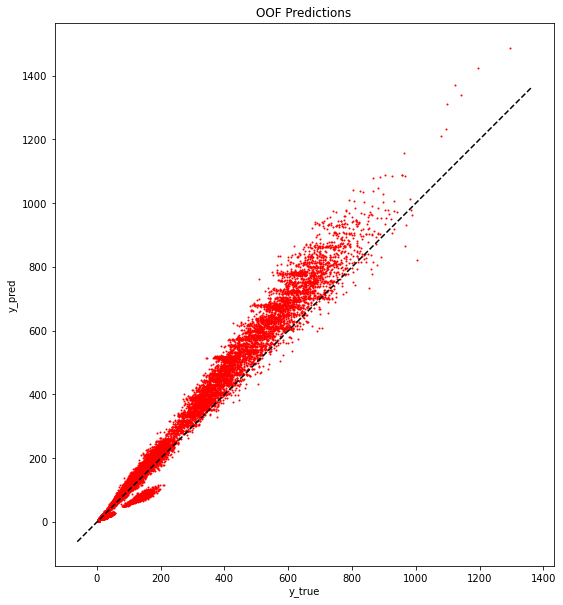

{2017, 2018, 2019}
{2019, 2020}
Fold 0.1 | 00:01 | SMAPE BC: 8.35770 | SMAPE AC: 16.00010
{2017, 2018, 2019, 2020}
{2020, 2021}
Fold 0.2 | 00:02 | SMAPE BC: 6.11100 | SMAPE AC: 21.32540
Average SMAPE: 11.40087


In [269]:
runs = 1
np.random.seed(5)
start_time = datetime.now()
# index_2020 = train_eng2.loc[train_eng2['date'].dt.year==2020].index
# train_eng2_excovid = train_eng2.loc[train_eng2['date'].dt.year!=2020]
oof = pd.Series(0.0, index=train_eng2.index)
scores = []
for run in range(runs):
    run_model('splitcv')

print(f"Average SMAPE: {sum(scores) / len(scores):.5f}")
with open('oof.pickle', 'wb') as handle: 
    pickle.dump(oof, handle)

adding date features ...
adding spline features ...
adding GDP features ...
adding GDP Growth features ...
adding CPI features ...
adding unemployment rate ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


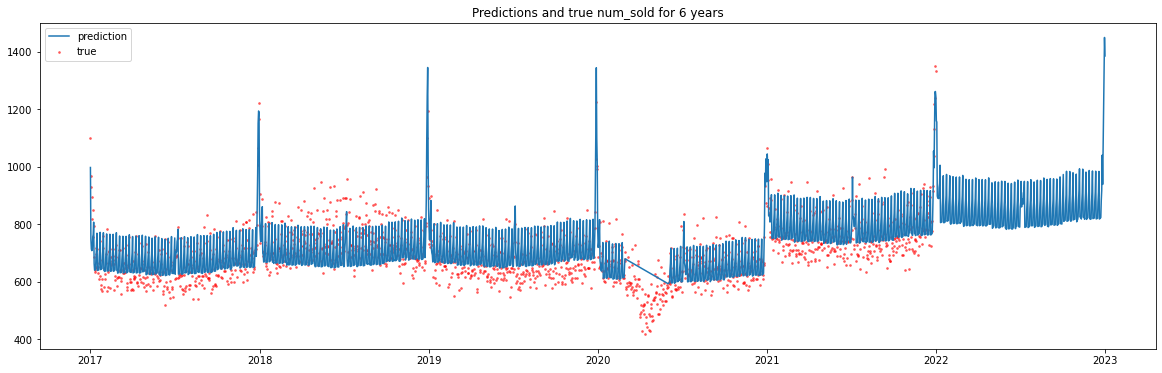

adding date features ...
adding spline features ...
adding GDP features ...
adding GDP Growth features ...
adding CPI features ...
adding unemployment rate ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


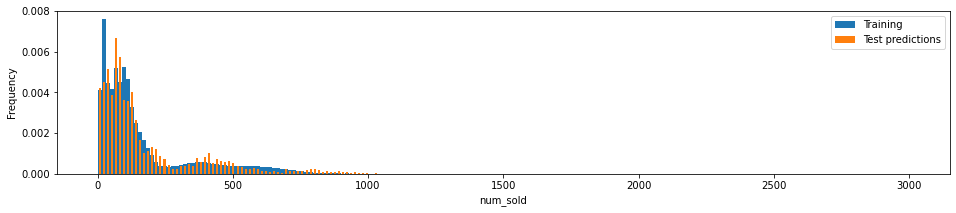

,id,num_sold
0,136950,50.879093
1,136951,52.599062
2,136952,8.055402
3,136953,49.536082
4,136954,42.103743
...,...,...
27370,164320,744.116357
27371,164321,715.858806
27372,164322,109.438676
27373,164323,670.159002


In [270]:
X_train = train_eng2[features]
y_train = np.log(train_eng2['num_sold'])

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

modelLR = build_model(X_tr_scaled, y_train, 'ridge')
# Quick check for debugging
resid_plot('Canada', 'Kagglazon', 'Using LLMs to Train More LLMs', modelLR, make_features2, features) 

# Inference for test
test_hat_list = []
test_hat_list.append(np.exp(modelLR.predict(scaler.transform(make_features2(test_data_ori)[features]))))

# Create the submission file
sub = test_data_ori[['id']].copy()
sub['num_sold'] = sum(test_hat_list) / len(test_hat_list)
# sub.to_csv('submissions/submission8.csv', index=False)

# Plot the distribution of the test predictions
plt.figure(figsize=(16,3))
plt.hist(train_eng2['num_sold'], bins=np.linspace(0, 3000, 201),
         density=True, label='Training')
plt.hist(sub['num_sold'], bins=np.linspace(0, 3000, 201),
         density=True, rwidth=0.5, label='Test predictions')
plt.xlabel('num_sold')
plt.ylabel('Frequency')
plt.legend()
plt.show()

sub

In [71]:
train_eng2.columns

Index(['id', 'date', 'num_sold', 'Year', 'Qtr', 'Month', 'Month_Sin', 'Day',
       'Day_Sin', 'Weekday', 'Week_Nb', 'Is_Weekend', 'DayofYear', 'is_fri',
       'is_sat', 'is_weekday', 'Is_ImpDate', 'is_covid', 'spline0', 'spline1',
       'spline2', 'spline3', 'gdp', 'cpi', 'unemp_rate', 'Is_Holiday',
       'Christmas_25', 'Christmas_26', 'Christmas_27', 'Christmas_28',
       'Christmas_29', 'Christmas_30', 'Christmas_31', 'newYear_1',
       'newYear_2', 'newYear_3', 'newYear_4', 'newYear_5', 'newYear_6',
       'newYear_7', 'newYear_8', 'newYear_9', 'country_Argentina',
       'country_Spain', 'country_Canada', 'country_Japan', 'country_Estonia',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better', 'Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People', 'store_Kaggle Learn',
       'store_Kagglazon', 'store_Kaggle Store', 'sin1', 'cos1', 'IYC_sin1',
       'IYC_cos1',

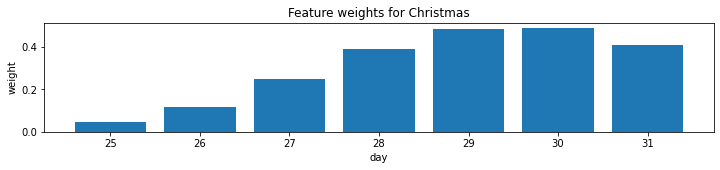

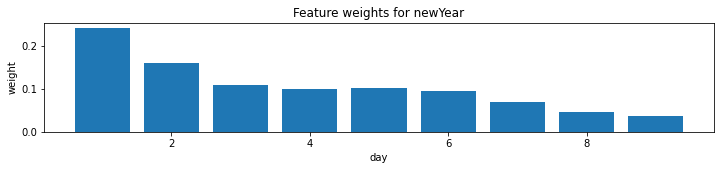

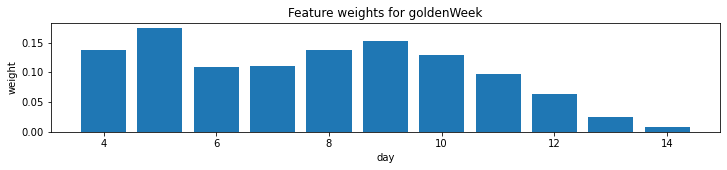

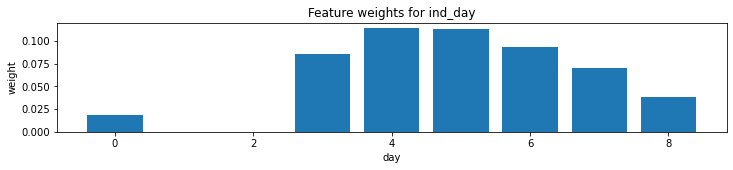

In [72]:
weights = pd.Series(modelLR.coef_, features)
weights_scaled = weights / scaler.scale_

def plot_feature_weights_numbered(prefix):
    prefix_features = [f for f in features if f.startswith(prefix)]
    plt.figure(figsize=(12, 2))
    plt.bar([int(f[len(prefix)+1:]) for f in prefix_features], weights_scaled[prefix_features])
    plt.title(f'Feature weights for {prefix}')
    plt.ylabel('weight')
    plt.xlabel('day')
    plt.show()
    
plot_feature_weights_numbered('Christmas')
plot_feature_weights_numbered('newYear')
plot_feature_weights_numbered('goldenWeek')
plot_feature_weights_numbered('ind_day')

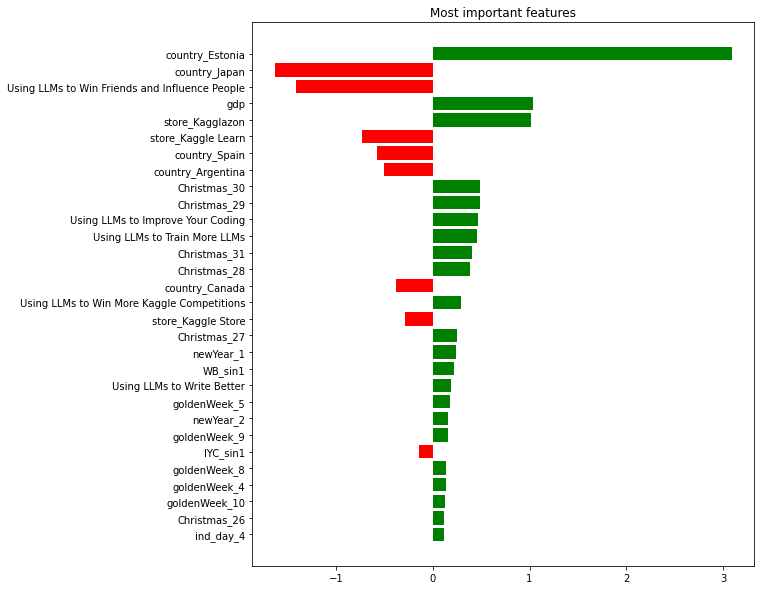

In [73]:
ws_sorted = weights_scaled.iloc[np.argsort(-np.abs(weights_scaled))]
ws_plot = ws_sorted.head(30)
plt.figure(figsize=(9, len(ws_plot) / 3))
plt.barh(np.arange(len(ws_plot)), ws_plot, color=ws_plot.apply(lambda ws: 'green' if ws >= 0 else 'red'))
plt.yticks(np.arange(len(ws_plot)), ws_plot.index)
plt.gca().invert_yaxis()
plt.title('Most important features')
plt.show()

In [74]:
sub.num_sold

0         47.252751
1         48.850132
2          7.481264
3         46.005462
4         39.102852
            ...    
27370    749.066741
27371    720.621200
27372    110.166739
27373    674.617369
27374    511.541667
Name: num_sold, Length: 27375, dtype: float64

## Creating csv file for training with ensemble model

In [77]:
def holiday_mapper2(data):
    df = data.copy()
    period = range(2017, 2022, 1)
    for i in list(set(train_data_ori['country'])):
        holidays = CountryHoliday(i, years=period)
        df['Holiday'] = df['date'].map(holidays).fillna('Not Holiday')
        
        df['Holiday'] = df['Holiday'].apply(lambda x: x 
                                                  if x != 'Asunción de la Virgen (Trasladado)' 
                                                  else 'Not Holiday')
        df['Is_Holiday'] = np.where(df['Holiday']=='Not Holiday',0,1)
    
    df.drop('Holiday', axis=1,inplace=True)

#     newyear_jan_date = df.date.apply(lambda date: pd.Timestamp(date.year,1,1))
#     newyear_dec_date = df.date.apply(lambda date: pd.Timestamp(date.year,12,31))
#     for day in (list(range(11))):
#         df[f'newYearJan_{day}'] = np.where(df.country!='Japan',(df.date - newyear_jan_date).dt.days.eq(day),0)
#     for day in (list(range(-5,1))):
#         df[f'newYearDec_{day}'] = np.where(df.country!='Japan',(df.date - newyear_dec_date).dt.days.eq(day),0)
    
#     # Applying christmas and excluding Japan
#     christmas_date = df.date.apply(lambda date: pd.Timestamp(date.year,12,25))       
#     for day in (list(range(-4,7))):
#         df[f'Christmas_{day}'] = np.where(df.country!='Japan',(df.date - christmas_date).dt.days.eq(day),0)

#     for d in range(25,32):
#         c_day = df.date.apply(lambda date: pd.Timestamp(date.year,12,d))
#         df[f'Christmas_{d}'] = np.where(df.country!='Japan',(df.date - c_day).dt.days.eq(0),0)
#     for d in range(1,10):
#         ny_day = df.date.apply(lambda date: pd.Timestamp(date.year,1,d))
#         df[f'newYear_{d}'] = (df.date - ny_day).dt.days.eq(0)    
        
    return df

In [78]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
def add_fourier2(df):
    tempDf = df.copy()
    tempDf = tempDf.set_index('date', drop=False).to_period('D')
    month = df.date.dt.month
    fourier = CalendarFourier(freq='M', order=12)
    dp = DeterministicProcess(index=tempDf.index, 
                              constant=False, order=1, seasonal=False, 
                              additional_terms=[fourier], drop=True)
    fourier_result = dp.in_sample().iloc[:,1:]
#     for k in range(1,2):
#         tempDf[f'sin{k}'] = np.sin(month / 12 * 2 * np.pi * k)
#         tempDf[f'cos{k}'] = np.cos(month / 12 * 2 * np.pi * k)
#         tempDf[f'IYC_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Improve Your Coding']
#         tempDf[f'IYC_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Improve Your Coding']
#         tempDf[f'TTL_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Train More LLMs']
#         tempDf[f'TTL_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Train More LLMs']
#         tempDf[f'WMKC_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Win More Kaggle Competitions']
#         tempDf[f'WMKC_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Win More Kaggle Competitions']
#         tempDf[f'WB_sin{k}'] = tempDf[f'sin{k}'] * tempDf['Using LLMs to Write Better']
#         tempDf[f'WB_cos{k}'] = tempDf[f'cos{k}'] * tempDf['Using LLMs to Write Better']
    tempDf = pd.concat([tempDf, fourier_result], axis=1)
    return tempDf

In [133]:
def make_features3(df):
    print("adding date features ...")
    tempDf = create_dateFeature(df)
    print("adding spline features ...")
    Spline_Prf = MakeSplineFtre()
    tempDf = tempDf.merge(Spline_Prf, on = 'Day', how = 'left')
    print("adding GDP features ...")
    tempDf = add_gdp(tempDf)
    print("adding GDP Growth features ...")
    tempDf = add_gdp_growth(tempDf)
    print("adding CPI features ...")
    tempDf = add_cpi(tempDf)
    print("adding unemployment rate ...")    
    tempDf = add_unemp_rate(tempDf)
    print("adding holiday features ...")
    tempDf = holiday_mapper2(tempDf)
    
    countries = list(set(train_data_ori['country']))
    products = list(set(train_data_ori['product']))
    stores = list(set(train_data_ori['store']))
#     products.remove('Using LLMs to Win Friends and Influence People')
#     stores.remove('Kaggle Learn')
    print("adding dummies ...")
    for c in countries:
        tempDf[f'country_{c}'] = tempDf.country == c
        
    for p in products:
        tempDf[f'{p}'] = tempDf['product'] == p
        
    for s in stores:
        tempDf[f'store_{s}'] = tempDf.store == s
        
    print("adding fourier ...")    
    tempDf = add_fourier2(tempDf)
    tempDf.drop(['store','country','product'], axis=1, inplace=True)
    return tempDf

In [134]:
out_csv = make_features3(train_data_ori)
out_csv

adding date features ...
adding spline features ...
adding GDP features ...
adding GDP Growth features ...
adding CPI features ...
adding unemployment rate ...
adding holiday features ...
adding dummies ...
adding fourier ...


,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,"sin(8,freq=M)","cos(8,freq=M)","sin(9,freq=M)","cos(9,freq=M)","sin(10,freq=M)","cos(10,freq=M)","sin(11,freq=M)","cos(11,freq=M)","sin(12,freq=M)","cos(12,freq=M)"
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,2017-01-01,63,2017,1,1,5.000000e-01,1,0.5,6,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,1,2017-01-01,66,2017,1,1,5.000000e-01,1,0.5,6,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,2,2017-01-01,9,2017,1,1,5.000000e-01,1,0.5,6,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,3,2017-01-01,59,2017,1,1,5.000000e-01,1,0.5,6,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,4,2017-01-01,49,2017,1,1,5.000000e-01,1,0.5,6,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,136945,2021-12-31,700,2021,4,12,-2.449294e-16,31,-0.5,4,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758
2021-12-31,136946,2021-12-31,752,2021,4,12,-2.449294e-16,31,-0.5,4,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758
2021-12-31,136947,2021-12-31,111,2021,4,12,-2.449294e-16,31,-0.5,4,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758


In [135]:
test_eng_out = make_features3(test_data_ori)
test_eng_out

adding date features ...
adding spline features ...
adding GDP features ...
adding GDP Growth features ...
adding CPI features ...
adding unemployment rate ...
adding holiday features ...
adding dummies ...
adding fourier ...


,id,date,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,Week_Nb,...,"sin(8,freq=M)","cos(8,freq=M)","sin(9,freq=M)","cos(9,freq=M)","sin(10,freq=M)","cos(10,freq=M)","sin(11,freq=M)","cos(11,freq=M)","sin(12,freq=M)","cos(12,freq=M)"
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,136950,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2022-01-01,136951,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2022-01-01,136952,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2022-01-01,136953,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2022-01-01,136954,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,164320,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758
2022-12-31,164321,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758
2022-12-31,164322,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758


In [143]:
out_csv.to_csv('train_engineered.csv', index=False)

In [144]:
test_eng_out.to_csv('test_engineered.csv', index=False)

# Submissions

Based on submission scores which only calculates SMAPE based on data January-March, current model predict lower sales. Applying correction multiplication can provide lower score, however I currently need to either validate those date ranges or apply correction to SMAPE.  
Current plan is to submit one without correction and one with correction

In [284]:
test_eng = make_features2(test_data_ori)
test_eng

adding date features ...
adding spline features ...
adding GDP features ...
adding GDP Growth features ...
adding CPI features ...
adding unemployment rate ...
adding holiday features ...
adding dummies ...
adding fourier ...
adding independence days ...
adding Japan holiday ...


,id,date,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,Week_Nb,...,goldenWeek_5,goldenWeek_6,goldenWeek_7,goldenWeek_8,goldenWeek_9,goldenWeek_10,goldenWeek_11,goldenWeek_12,goldenWeek_13,goldenWeek_14
0,136950,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
1,136951,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
2,136952,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
3,136953,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
4,136954,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,164320,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
27371,164321,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
27372,164322,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0
27373,164323,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,0,0,0,0,0,0,0,0,0,0


In [285]:
y_hat = np.exp(model2.predict(scaler.transform(test_eng[features])))
y_hat

array([ 52.82145002,  54.60708086,   8.36292462, ..., 116.78075734,
       715.11899256, 542.25280607])

In [120]:
sub = pd.DataFrame(zip(test_eng.id,y_hat*2), columns=['id','num_sold'])
sub

,id,num_sold
0,136950,92.475595
1,136951,95.601735
2,136952,14.641143
3,136953,90.034599
4,136954,76.525906
...,...,...
27370,164320,1489.757344
27371,164321,1433.184343
27372,164322,219.101582
27373,164323,1341.691101


In [179]:
best_df = pd.read_csv('submissions/sub20.csv')
best_df

,id,num_sold
0,136950,114.361020
1,136951,122.278130
2,136952,19.432741
3,136953,107.563675
4,136954,95.052380
...,...,...
27370,164320,673.367900
27371,164321,721.723140
27372,164322,114.734085
27373,164323,649.182070


In [121]:
sub.to_csv('submissions/submission21.csv', index=False)

In [170]:
sliced_ = test_eng.loc[test_eng['date'].between(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-03-01'))]
sliced_.date

0      2022-01-01
1      2022-01-01
2      2022-01-01
3      2022-01-01
4      2022-01-01
          ...    
4495   2022-03-01
4496   2022-03-01
4497   2022-03-01
4498   2022-03-01
4499   2022-03-01
Name: date, Length: 4500, dtype: datetime64[ns]

In [185]:
# best_sliced = best_df.loc[best_df.id.isin(sliced_.id)]
# cur_sub = sub.loc[sub.id.isin(sliced_.id)]

best_df['date'] = test_eng.date
sub['date'] = test_eng.date

In [188]:
best_df.num_sold.mean()

261.32371584356093

In [189]:
sub.num_sold.mean()

177.30001274788393

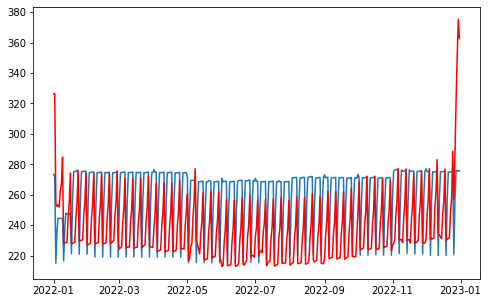

In [193]:
import seaborn as sns
group_best = best_df.groupby('date').mean()
group_cur = sub.groupby('date').mean()
plt.figure(figsize=(8,5))
plt.plot(group_best.index, group_best.num_sold)
plt.plot(group_cur.index, group_cur.num_sold*1.34, color='r')